# Regresja logistyczna

Model regresji logistycznej w R buduje się za pomocą funkcji `glm()`, która służy do dopasowania uogólnionych modeli liniowych. Funkcja ta wyznacza m.in. oszacowania współczynników `b` oraz wylicza wartości reszt. W celu budowy modelu regresji logistycznej należy przy wywołaniu funkcji `glm()` podać argument `family = "binomial"` (rodzina rozkładów dwumianowych).

Jako przykład wywołania funkcji `glm()` do budowy modelu regresji logistycznej wykorzystamy dane na temat cen domów z wykładu o regresji liniowej i wielorakiej (plik House-Price.csv). Aby samodzielnie przeanalizować przykład w RStudio, należy je najpierw poddać wstępnemu przetwarzaniu, podobnie jak na wykładzie). W najprostszym przypadku użyjemy tylko jednego predyktora: ceny (zmienna `price`) do przewidzenia czy dom zostanie sprzedany w przeciągu trzech miesięcy (zmienna `Sold`. Wartość 1 oznacza, że dom został sprzedany, 0 - nie sprzedany).

In [1]:
library(readr)
library(tidyverse)
options(jupyter.rich_display=FALSE,
        repr.plot.width=15,
        repr.plot.height=8)

df <- read_csv("data/House-Price.csv")
df$avg_dist = (df$dist1+df$dist2+df$dist3+df$dist4)/4

df2 <- df[,-6:-9]
df <- df2
rm(df2)

df <-df[,-13]

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 506 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): airport, waterbody, bus_ter
dbl (16): price, resid_area, air_qual, room_num, age, dist1, dist2, dist3, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
glimpse(df)

Rows: 506
Columns: 15
$ price       <dbl> 24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 22.1, 16.5, 18.9…
$ resid_area  <dbl> 32.31, 37.07, 37.07, 32.18, 32.18, 32.18, 37.87, 37.87, 37…
$ air_qual    <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.…
$ room_num    <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.…
$ age         <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.…
$ teachers    <dbl> 24.7, 22.2, 22.2, 21.3, 21.3, 21.3, 24.8, 24.8, 24.8, 24.8…
$ poor_prop   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 1…
$ airport     <chr> "YES", "NO", "NO", "YES", "NO", "YES", "YES", "NO", "YES",…
$ n_hos_beds  <dbl> 5.480, 7.332, 7.394, 9.268, 8.824, 7.174, 6.958, 5.842, 5.…
$ n_hot_rooms <dbl> 11.1920, 12.1728, 101.1200, 11.2672, 11.2896, 14.2296, 12.…
$ waterbody   <chr> "River", "Lake", "None", "Lake", "Lake", "None", "River", …
$ rainfall    <dbl> 23, 42, 38, 45, 55, 53, 41, 56, 55, 45, 29, 23, 57, 39, 49…
$ parks       <dbl

In [3]:
head(df)

  price resid_area air_qual room_num age  teachers poor_prop airport n_hos_beds
1 24.0  32.31      0.538    6.575    65.2 24.7     4.98      YES     5.480     
2 21.6  37.07      0.469    6.421    78.9 22.2     9.14      NO      7.332     
3 34.7  37.07      0.469    7.185    61.1 22.2     4.03      NO      7.394     
4 33.4  32.18      0.458    6.998    45.8 21.3     2.94      YES     9.268     
5 36.2  32.18      0.458    7.147    54.2 21.3     5.33      NO      8.824     
6 28.7  32.18      0.458    6.430    58.7 21.3     5.21      YES     7.174     
  n_hot_rooms waterbody rainfall parks      Sold avg_dist
1  11.1920    River     23       0.04934731 0    4.0875  
2  12.1728    Lake      42       0.04614563 1    4.9675  
3 101.1200    None      38       0.04576397 0    4.9675  
4  11.2672    Lake      45       0.04715060 0    6.0650  
5  11.2896    Lake      55       0.03947400 0    6.0625  
6  14.2296    None      53       0.04590965 1    6.0600  

`geom_smooth()` using formula = 'y ~ x'


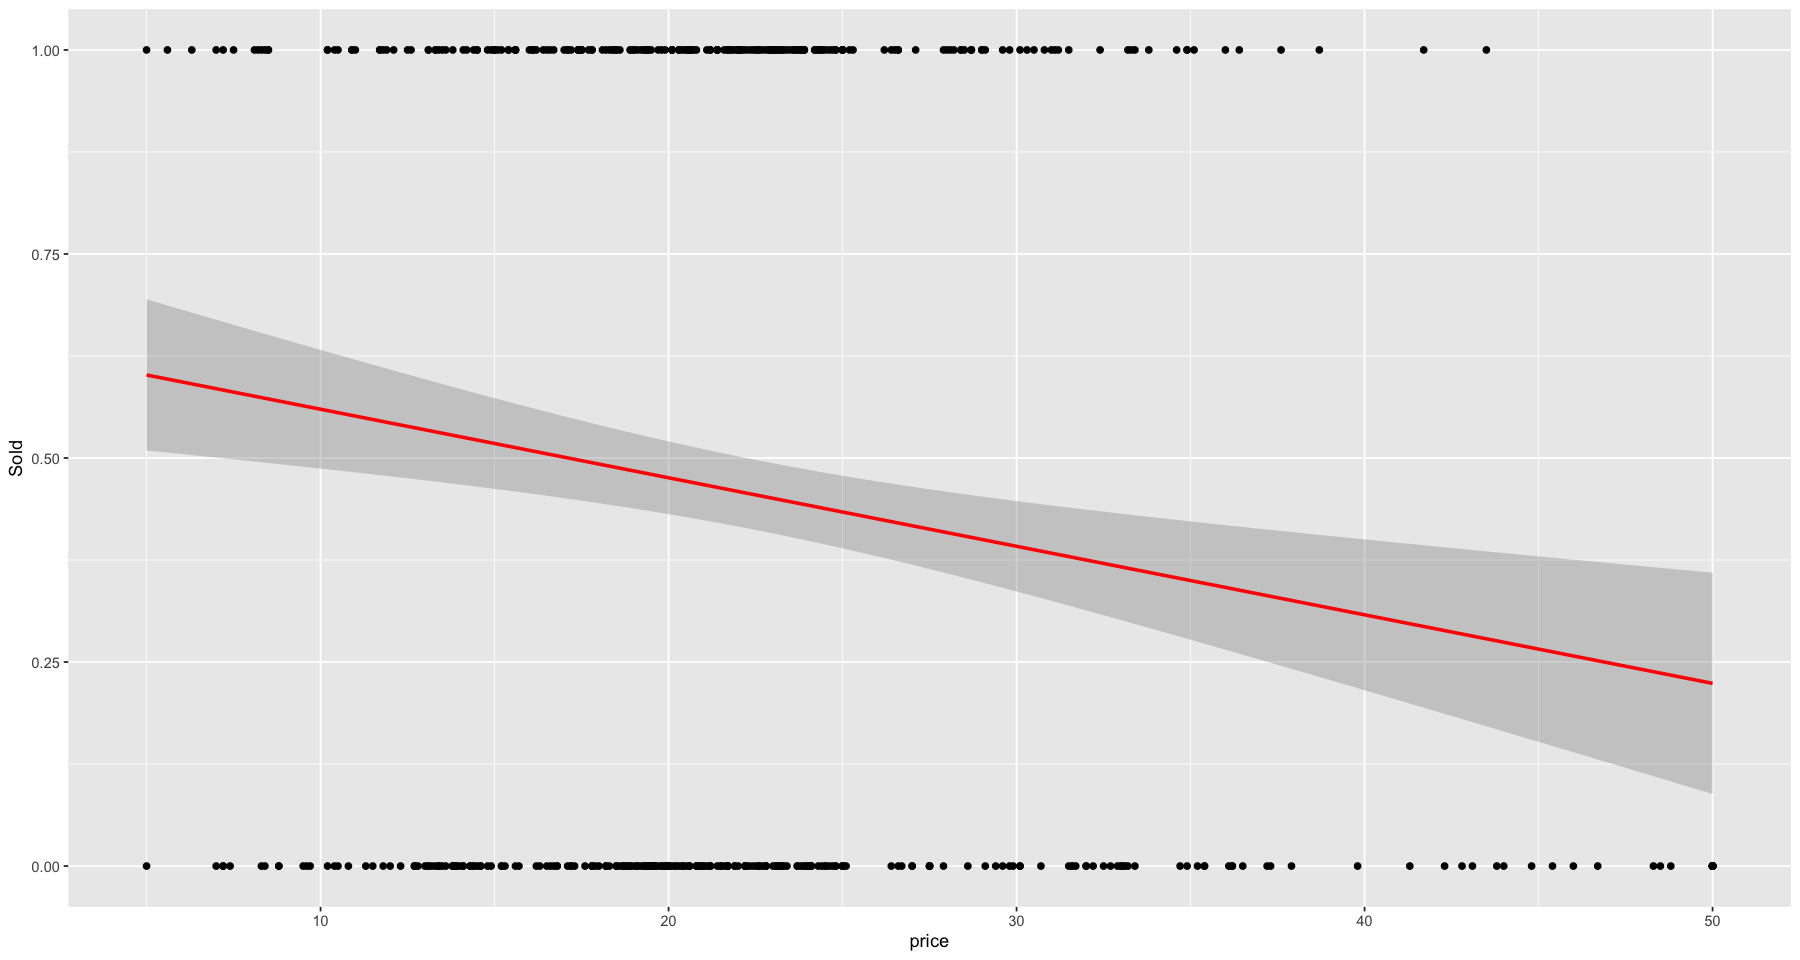

In [4]:
ggplot(df, aes(x = price, y = Sold)) +
    geom_point() +
    geom_smooth(method = 'glm', colour = 'red')

In [5]:
glm.fit = glm(Sold~price, data = df, family = binomial)

summary(glm.fit)


Call:
glm(formula = Sold ~ price, family = binomial, data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.61486    0.24751   2.484 0.012986 *  
price       -0.03572    0.01045  -3.417 0.000632 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 697.28  on 505  degrees of freedom
Residual deviance: 684.81  on 504  degrees of freedom
AIC: 688.81

Number of Fisher Scoring iterations: 4


W wyświetlonym podsumowaniu zostają przytoczone oceny współczynników dla kolejnych zmiennych objaśniających (w tym przypadku jedna zmienna `price`), odchylenia standardowe tych ocen, wartości statystyki testowej dla testu, w którym hipotezą zerową jest nieistotność danej zmiennej oraz p-wartość dla tego testu. Im p-wartość jest niższa, tym istotniejsza jest zmienna. Graficznie ta istotność jest przedstawiona gwiazdkami po prawej stronie. Wiersze tabeli odpowiadają zmiennym objaśniającym i wyrazowi wolnemu dopasowanego modelu.

Możemy odwołać się do konkretnych właściwości utworzonego obiektu klasy `glm`: - tabela oszacowań współczynników modelu (dodatkowo funkcja `$coef` lub `$coefficients` na obiekcie `summary`):

In [6]:
glm.fit$coefficients

summary(glm.fit)$coef

(Intercept)       price 
  0.6148602  -0.0357225 

            Estimate   Std. Error z value   Pr(>|z|)    
(Intercept)  0.6148602 0.24751240  2.484159 0.0129857765
price       -0.0357225 0.01045335 -3.417327 0.0006323935

-   dopasowane przez model prawdopodobieństwa "sukcesu" dla każdej z prób - wartości dopasowane przez model przekształcone przez funkcję wiążącą:

In [7]:
glm.fit$fitted.values

        1         2         3         4         5         6         7         8 
0.4396753 0.4608936 0.3487109 0.3593305 0.3366421 0.3988221 0.4493778 0.4564588 
        9        10        11        12        13        14        15        16 
0.5063594 0.4849308 0.5197454 0.4849308 0.4600061 0.4715610 0.4911786 0.4760140 
       17        18        19        20        21        22        23        24 
0.4476106 0.4974291 0.4733417 0.4911786 0.5322139 0.4786877 0.5179618 0.5242021 
       25        26        27        28        29        30        31        32 
0.5143933 0.5295449 0.5054665 0.5215285 0.4893931 0.4662234 0.5402091 0.5242021 
       33        34        35        36        37        38        39        40 
0.5357696 0.5366580 0.5331031 0.4849308 0.4751231 0.4662234 0.4379160 0.3809795 
       41        42        43        44        45        46        47        48 
0.3470900 0.4169374 0.4282685 0.4335245 0.4644459 0.4813626 0.4751231 0.5054665 
       49        50        5

-   reszty dla każdej z prób:

In [8]:
glm.fit$residuals

        1         2         3         4         5         6         7         8 
-1.784680  2.169698 -1.535416 -1.560867 -1.507482  2.507384  2.225299  2.190778 
        9        10        11        12        13        14        15        16 
-2.025765 -1.941487  1.924019  2.062150  2.173884 -1.892366 -1.965326 -1.908448 
       17        18        19        20        21        22        23        24 
-1.810317  2.010337 -1.898764  2.035919 -2.137729 -1.918236  1.930644 -2.101732 
       25        26        27        28        29        30        31        32 
 1.944038 -2.125601  1.978371  1.917441  2.043347 -1.873443 -2.174902  1.907661 
       33        34        35        36        37        38        39        40 
-2.154103  1.863384 -2.141801  2.062150 -1.905209 -1.873443  2.283543  2.624813 
       41        42        43        44        45        46        47        48 
 2.881097  2.398441  2.334984  2.306675 -1.867225 -1.928129 -1.905209 -2.022108 
       49        50        5

-   rodzina rozkładów zmiennej objaśnianej oraz użyta funkcja wiążąca:

In [9]:
glm.fit$family


Family: binomial 
Link function: logit 


-   liczba wykonanych iteracji algorytmu:

In [10]:
glm.fit$iter

[1] 4

-   czy algorytm zakończył iterowanie bo znalazł maksimum (wartość `TRUE`) czy dlatego że wykonał więcej iteracji niż założono (wartość `FALSE`):

In [11]:
glm.fit$converged

[1] TRUE

## Regresja logistyczna dla wielu zmiennych objaśniających

In [12]:

glm.fit = glm(Sold~., data = df, family = binomial)

summary(glm.fit)


Call:
glm(formula = Sold ~ ., family = binomial, data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -2.082869   2.666027  -0.781 0.434648    
price                   -0.269424   0.033022  -8.159 3.38e-16 ***
resid_area               0.021153   0.026803   0.789 0.429999    
air_qual                -7.604377   2.704325  -2.812 0.004924 ** 
room_num                 1.066214   0.277766   3.839 0.000124 ***
age                     -0.001853   0.006610  -0.280 0.779236    
teachers                 0.305848   0.064132   4.769 1.85e-06 ***
poor_prop               -0.207984   0.033889  -6.137 8.40e-10 ***
airportYES              -0.172264   0.211907  -0.813 0.416263    
n_hos_beds               0.173106   0.071200   2.431 0.015046 *  
n_hot_rooms             -0.057136   0.052165  -1.095 0.273392    
waterbodyLake and River  0.022992   0.361260   0.064 0.949254    
waterbodyNone            0.093718   0.306716   0.306 0.759944    


Na podstawie uzyskanych wyników możemy zbudować model końcowy (złożony ze zmiennych `price`, `air_qual`, `room_num`, `teachers`, `poor_prop`, `n_hos_beds` oraz `av_dist`). W celu wybrania najlepszego modelu możemy też skorzystać z funkcji `step()`.

In [13]:
model_koncowy <- glm(formula = Sold~price+air_qual+room_num+teachers+poor_prop+
                       n_hos_beds+avg_dist, data = df, family = binomial)
summary(model_koncowy)

step(model_koncowy, direction = "backward")


Call:
glm(formula = Sold ~ price + air_qual + room_num + teachers + 
    poor_prop + n_hos_beds + avg_dist, family = binomial, data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.38996    2.18987  -0.635 0.525610    
price       -0.27311    0.03276  -8.337  < 2e-16 ***
air_qual    -4.67776    1.63793  -2.856 0.004292 ** 
room_num     1.00751    0.26822   3.756 0.000172 ***
teachers     0.30235    0.06246   4.841 1.29e-06 ***
poor_prop   -0.21423    0.03212  -6.671 2.55e-11 ***
n_hos_beds   0.16050    0.07009   2.290 0.022019 *  
avg_dist    -0.41799    0.08769  -4.767 1.87e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 686.12  on 497  degrees of freedom
Residual deviance: 562.94  on 490  degrees of freedom
  (8 observations deleted due to missingness)
AIC: 578.94

Number of Fisher Scoring iterations: 5


Start:  AIC=578.94
Sold ~ price + air_qual + room_num + teachers + poor_prop + n_hos_beds + 
    avg_dist

             Df Deviance    AIC
<none>            562.94 578.94
- n_hos_beds  1   568.25 582.25
- air_qual    1   571.28 585.28
- room_num    1   579.21 593.21
- teachers    1   588.24 602.24
- avg_dist    1   588.65 602.65
- poor_prop   1   619.47 633.47
- price       1   674.43 688.43



Call:  glm(formula = Sold ~ price + air_qual + room_num + teachers + 
    poor_prop + n_hos_beds + avg_dist, family = binomial, data = df)

Coefficients:
(Intercept)        price     air_qual     room_num     teachers    poor_prop  
    -1.3900      -0.2731      -4.6778       1.0075       0.3023      -0.2142  
 n_hos_beds     avg_dist  
     0.1605      -0.4180  

Degrees of Freedom: 497 Total (i.e. Null);  490 Residual
  (8 observations deleted due to missingness)
Null Deviance:	    686.1 
Residual Deviance: 562.9 	AIC: 578.9

Funkcja `vif` (z pakietu `car`) służy do zbadania współliniowości zmiennych:

In [14]:
library(car)
vif(model_koncowy)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




     price   air_qual   room_num   teachers  poor_prop n_hos_beds   avg_dist 
  6.138414   3.405290   2.344649   1.691387   4.010196   1.029540   3.018423 

Analizę końcowego modelu możemy wykonać za pomocą szans (ilorazu prawdopodobieństwa sukcesu do prawdopodobieństwa porażki)

In [15]:
exp(coef(model_koncowy))

(Intercept)       price    air_qual    room_num    teachers   poor_prop 
0.249086098 0.761007474 0.009299867 2.738764402 1.353034507 0.807161160 
 n_hos_beds    avg_dist 
1.174098163 0.658369272 

Szansa dla zmiennej `price` wynosi 0.76, co oznacza, że wraz ze wzrostem ceny o jedną jednostkę szansa na sprzedaż domu maleje o ok 24%. Natomiast wraz ze zwiększeniem się ilości nauczycieli przypadających na tysiąc mieszkańców o jeden (zmienna `teachers`), szansa sprzedania domu w tej okolicy wzrasta średnio o 35%.

## Zadania

1.  Wczytaj dane `lab4-dane.csv`. Zawierają one informacje na temat matek i ich dzieci, u których wykryto pewną rzadko występującą wadę wrodzoną (grupa badana) oraz zdrowych (grupa kontrolna).

In [16]:
moms <- read_delim("data/lab4-dane.csv", delim=";")

names(moms) <- gsub(" ", "", names(moms))
moms <- moms %>%
  mutate(
    GRUPA = as.factor(GRUPA),
    MiejsceZam = as.logical(MiejsceZam),
    Płeć = as.logical(Płeć),
    MasaUr = as.double(gsub(",", ".", MasaUr)),
    WiekM = as.integer(WiekM),
    KolCiazy = as.integer(KolCiazy),
    PoronSamo = as.logical(PoronSamo),
    InfOddech = as.logical(InfOddech),
    Palenie = as.logical(Palenie),
    WyksztM = as.factor(WyksztM),
    Wzawodowe = as.logical(Wzawodowe),
    Wsrednie = as.logical(Wsrednie),
    Wwyzsze = as.logical(Wwyzsze),
  )

Rows: 767 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (2): GRUPA, MasaUr
dbl (11): MiejsceZam, Płeć, Wiek M, KolCiazy, PoronSamo, InfOddech, Palenie,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


2.  Przeanalizuj dane oraz wyświetl podstawowe statystyki opisowe dla analizowanych zmiennych. Następnie narysuj histogramy dla zmiennych `WiekM` oraz `MasaUr`. Oceń rozkłady tych zmiennych.

In [17]:
glimpse(moms)

Rows: 767
Columns: 13
$ GRUPA      <fct> badana, badana, badana, badana, badana, badana, badana, bad…
$ MiejsceZam <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE,…
$ Płeć       <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE,…
$ MasaUr     <dbl> 2.75, 4.25, 3.75, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 4.25,…
$ WiekM      <int> 22, 27, 30, 32, 27, 21, 35, 24, 32, 18, 18, 28, 30, 27, 31,…
$ KolCiazy   <int> 1, 1, 2, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1,…
$ PoronSamo  <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALS…
$ InfOddech  <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, TRUE, TRUE, FALSE, FALSE, …
$ Palenie    <lgl> NA, FALSE, TRUE, FALSE, NA, FALSE, FALSE, FALSE, FALSE, FAL…
$ WyksztM    <fct> 3, 2, 3, NA, NA, 2, 4, 3, 2, 3, 1, 4, 2, 1, 4, 3, 1, 4, 3, …
$ Wzawodowe  <lgl> FALSE, TRUE, FALSE, NA, NA, TRUE, FALSE, FALSE, TRUE, FALSE…
$ Wsrednie   <lgl> TRUE, FALSE, TRUE, NA, NA, FALSE, FALSE, TRUE, FALSE, TRUE,…
$ Wwyzsze    <lgl>

In [18]:
head(moms)

  GRUPA  MiejsceZam Płeć  MasaUr WiekM KolCiazy PoronSamo InfOddech Palenie
1 badana TRUE        TRUE 2.75   22    1        FALSE      TRUE        NA  
2 badana TRUE       FALSE 4.25   27    1        FALSE     FALSE     FALSE  
3 badana TRUE        TRUE 3.75   30    2        FALSE      TRUE      TRUE  
4 badana TRUE       FALSE 3.25   32    6         TRUE     FALSE     FALSE  
5 badana TRUE       FALSE 3.25   27    1        FALSE     FALSE        NA  
6 badana TRUE       FALSE 3.25   21    1        FALSE      TRUE     FALSE  
  WyksztM Wzawodowe Wsrednie Wwyzsze
1 3       FALSE      TRUE    FALSE  
2 2        TRUE     FALSE    FALSE  
3 3       FALSE      TRUE    FALSE  
4 NA         NA        NA       NA  
5 NA         NA        NA       NA  
6 2        TRUE     FALSE    FALSE  

In [19]:
summary(moms)

       GRUPA     MiejsceZam        Płeć             MasaUr          WiekM   
 badana   :395   Mode:logical   Mode :logical   Min.   :0.000   Min.   :-1  
 kontrolna:372   TRUE:762       FALSE:332       1st Qu.:3.250   1st Qu.:24  
                 NA's:5         TRUE :430       Median :3.250   Median :28  
                                NA's :5         Mean   :3.306   Mean   :28  
                                                3rd Qu.:3.750   3rd Qu.:31  
                                                Max.   :5.250   Max.   :47  
    KolCiazy      PoronSamo       InfOddech        Palenie        WyksztM   
 Min.   : 1.000   Mode :logical   Mode :logical   Mode :logical   1   : 82  
 1st Qu.: 1.000   FALSE:674       FALSE:641       FALSE:649       2   :180  
 Median : 2.000   TRUE :93        TRUE :105       TRUE :62        3   :283  
 Mean   : 1.905                   NA's :21        NA's :56        4   :204  
 3rd Qu.: 2.000                                                   NA's: 18  

*`MasaUr` i `WiekM` mają w `summary(moms)` niedorzeczną wartość, sprawdźmy to wizualnie*

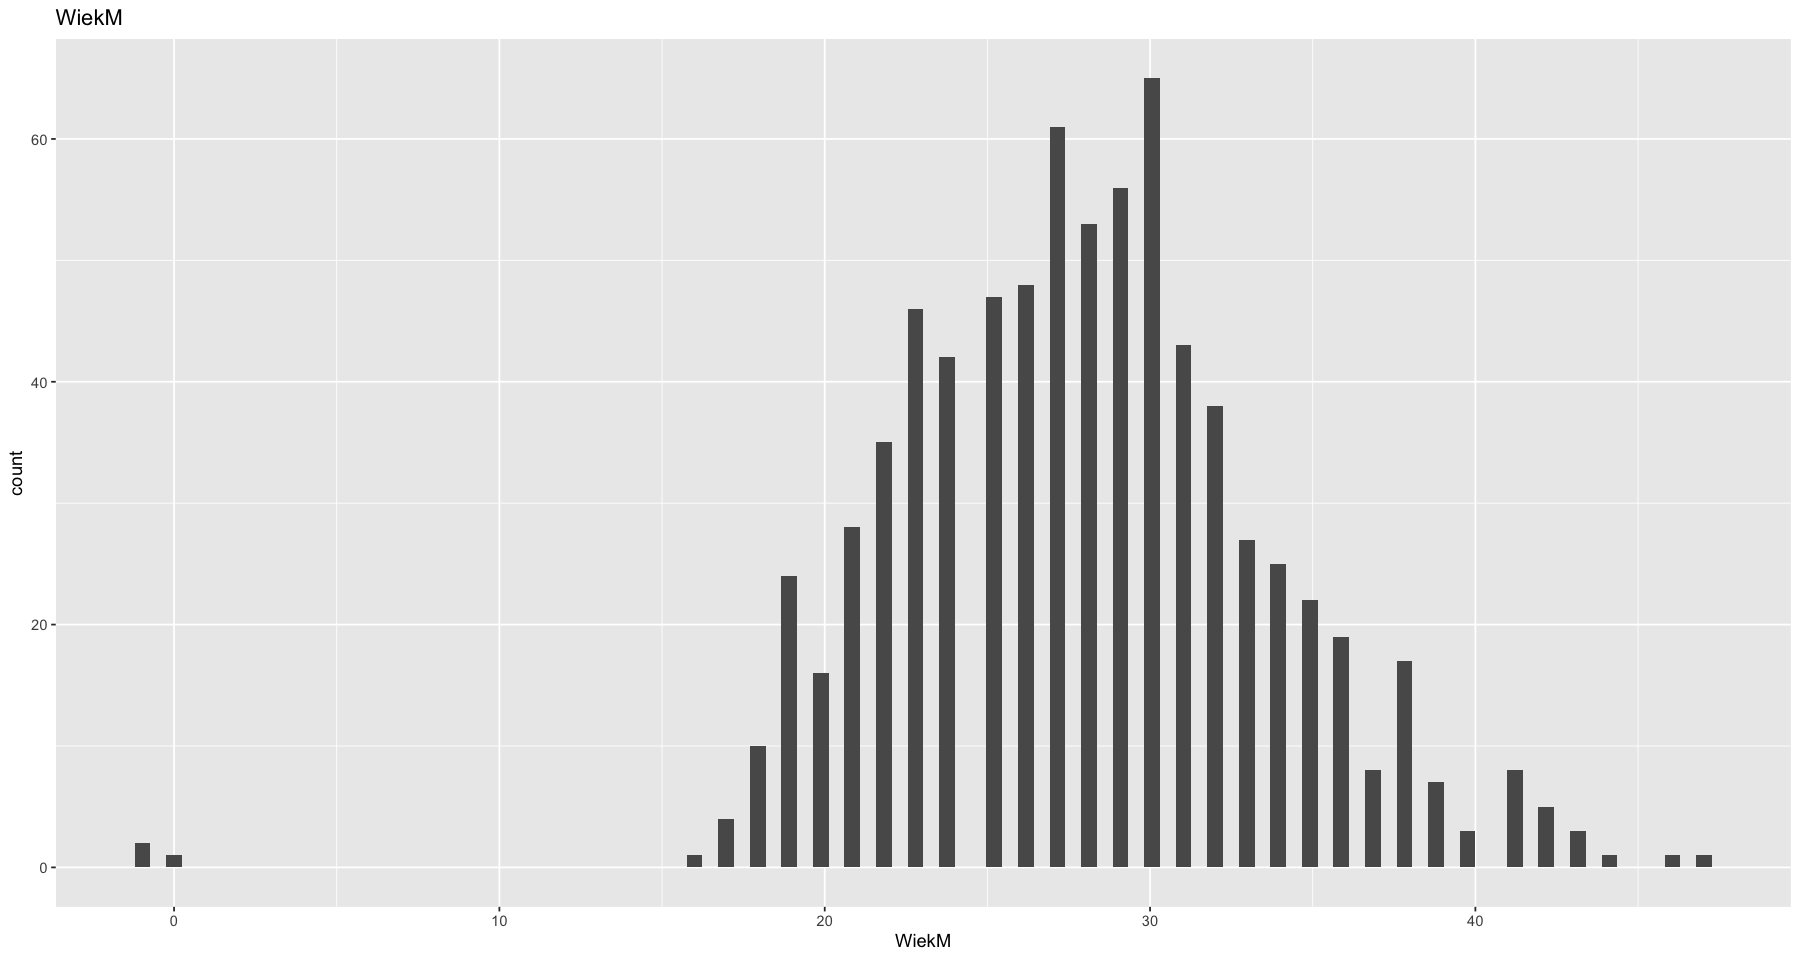

In [20]:
ggplot(moms, aes(x = WiekM)) +
    geom_histogram(bins=100) + 
    ggtitle("WiekM")

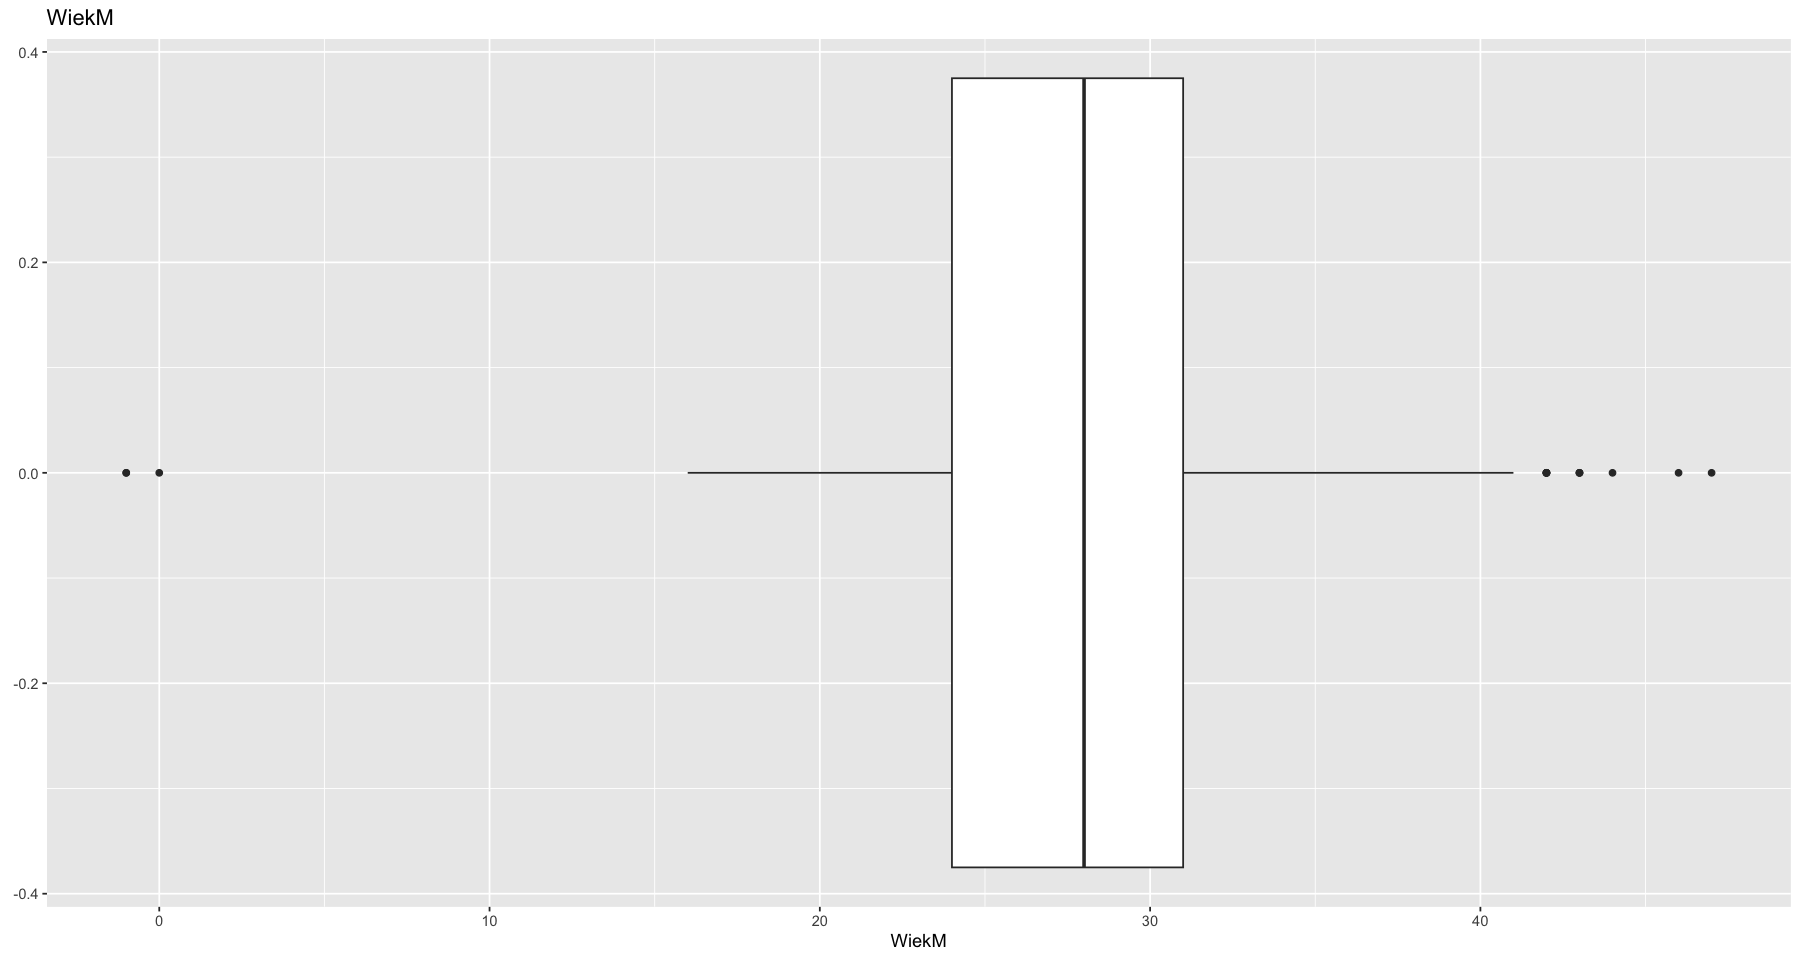

In [21]:
ggplot(moms, aes(x = WiekM)) +
    geom_boxplot() +
    ggtitle("WiekM")

___

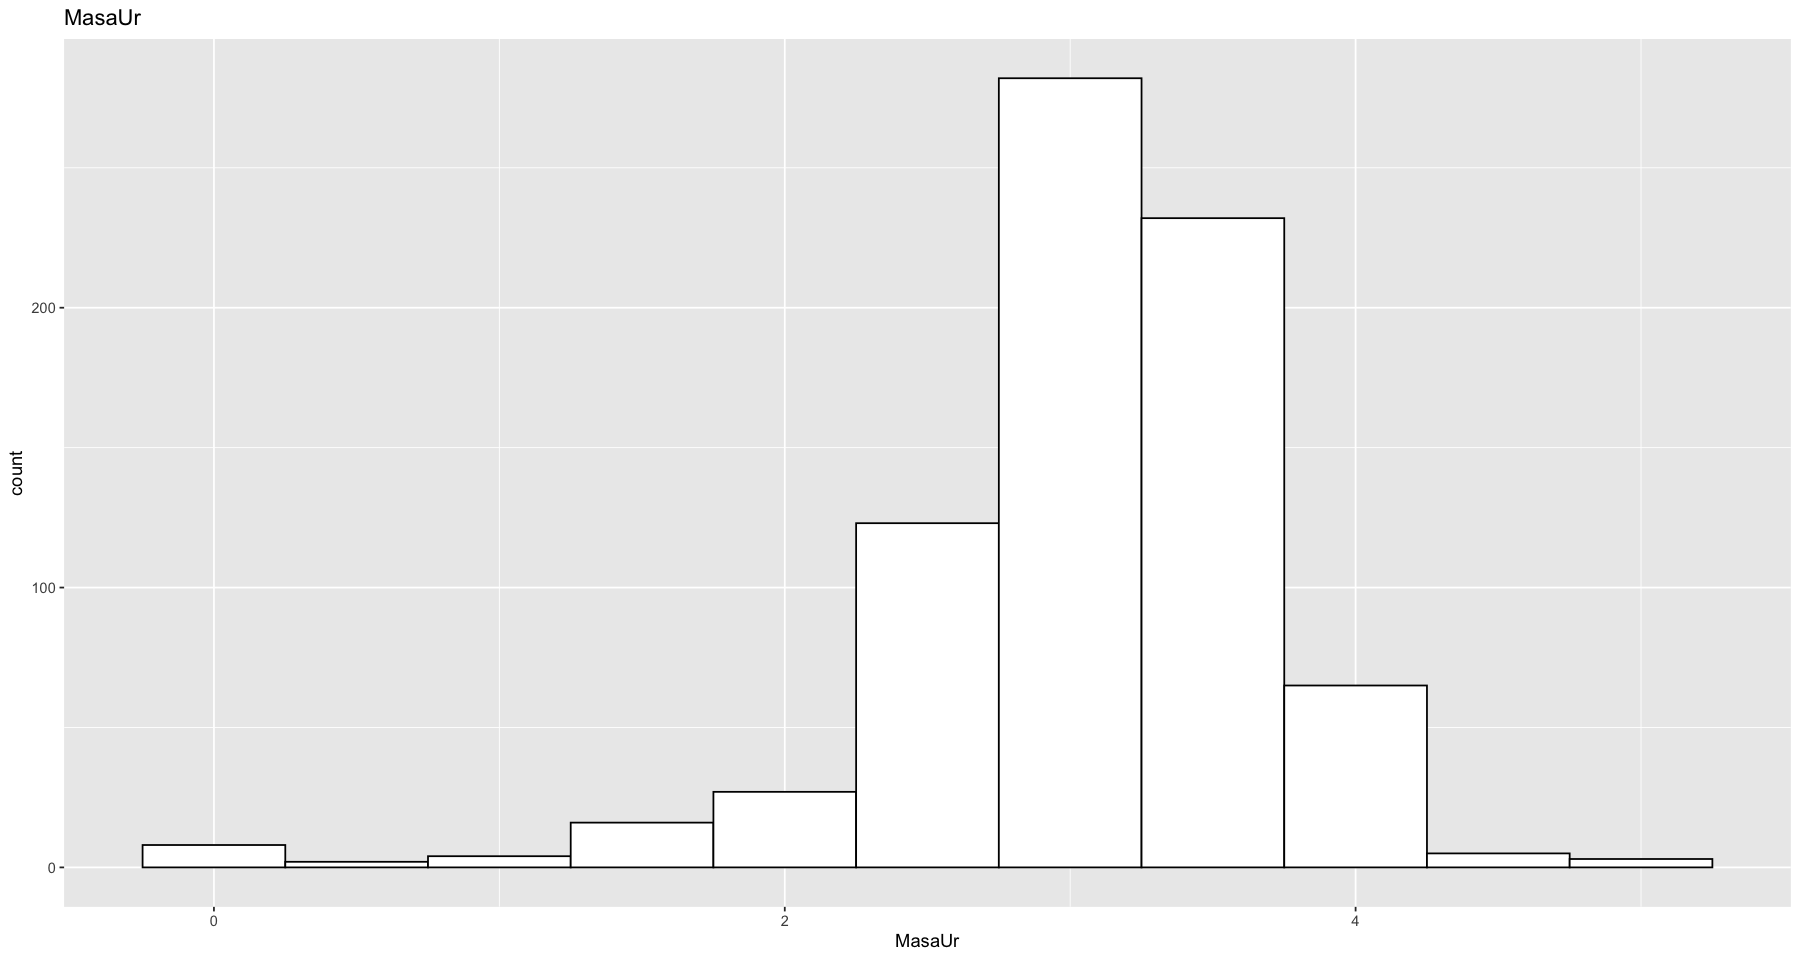

In [22]:
ggplot(moms, aes(x = MasaUr)) +
    geom_histogram(bins=20, binwidth = .5, color = "black", fill = "white") +
    ggtitle("MasaUr")

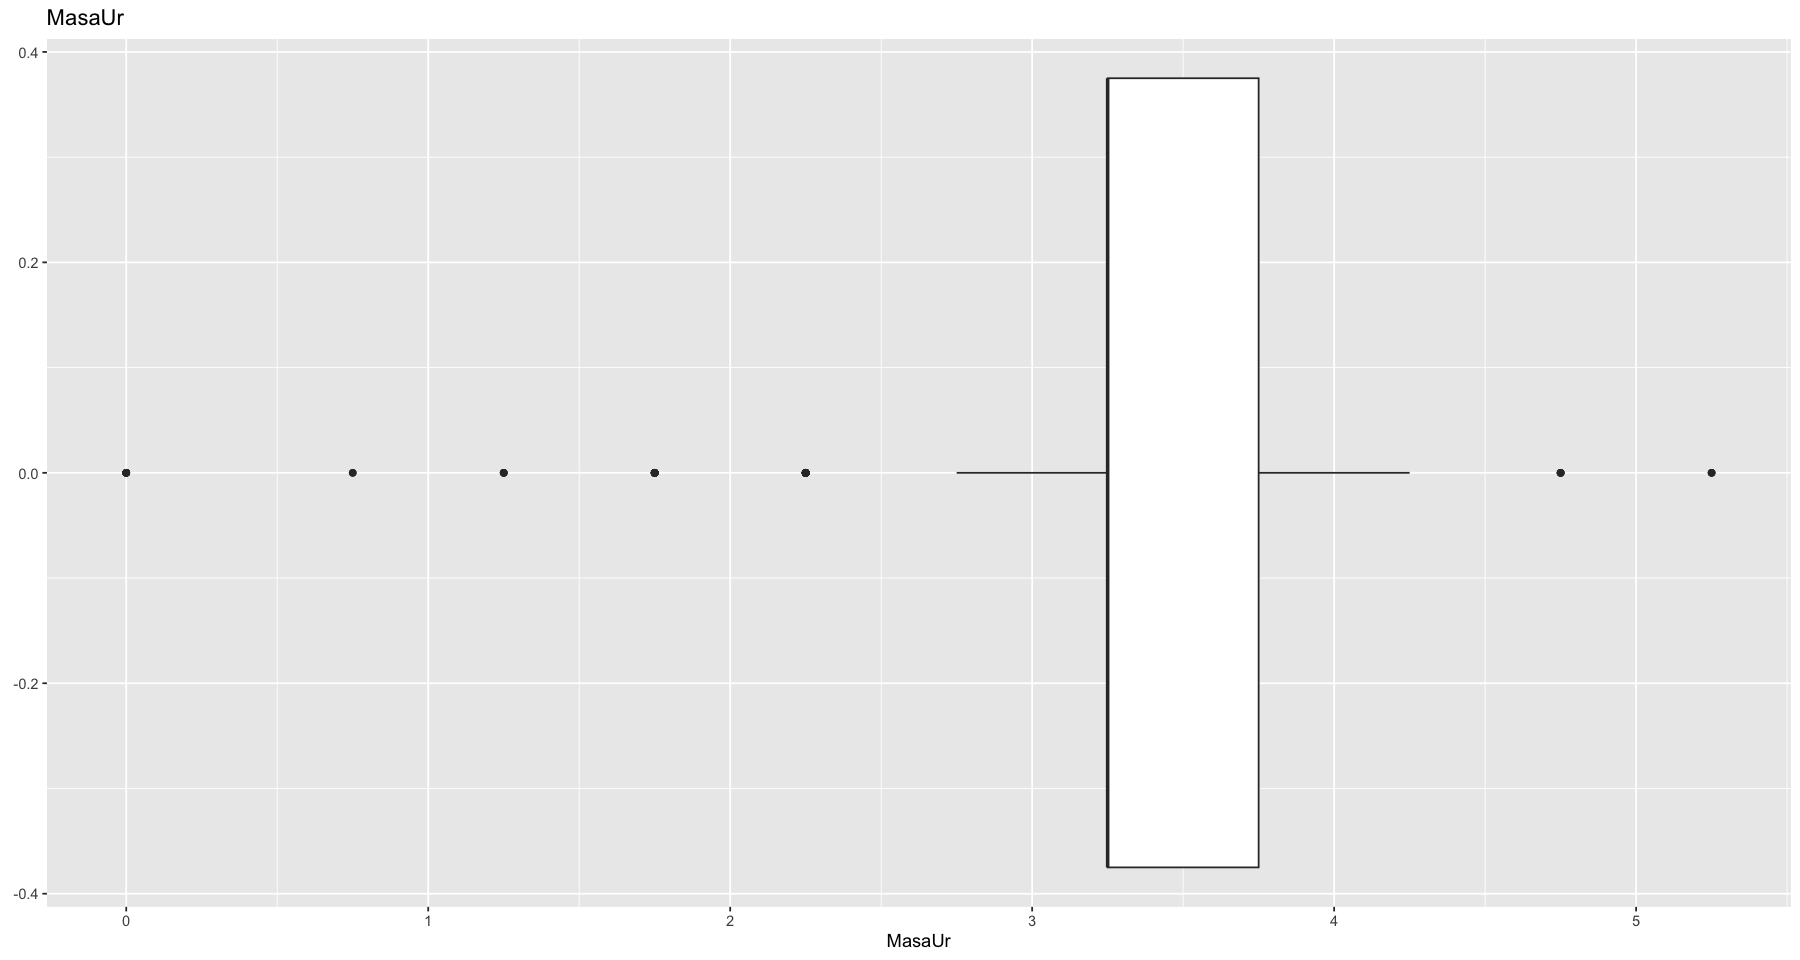

In [23]:
ggplot(moms, aes(x = MasaUr)) +
    geom_boxplot() + 
    ggtitle("MasaUr")

In [24]:
moms <- moms %>%
    filter(WiekM > 0 & MasaUr > 0 )

In [25]:
summary(moms)

       GRUPA     MiejsceZam        Płeć             MasaUr          WiekM      
 badana   :388   Mode:logical   Mode :logical   Min.   :0.750   Min.   :16.00  
 kontrolna:368   TRUE:751       FALSE:329       1st Qu.:3.250   1st Qu.:24.00  
                 NA's:5         TRUE :422       Median :3.250   Median :28.00  
                                NA's :5         Mean   :3.341   Mean   :28.08  
                                                3rd Qu.:3.750   3rd Qu.:31.00  
                                                Max.   :5.250   Max.   :47.00  
    KolCiazy      PoronSamo       InfOddech        Palenie        WyksztM   
 Min.   : 1.000   Mode :logical   Mode :logical   Mode :logical   1   : 81  
 1st Qu.: 1.000   FALSE:664       FALSE:632       FALSE:640       2   :176  
 Median : 2.000   TRUE :92        TRUE :103       TRUE :62        3   :281  
 Mean   : 1.901                   NA's :21        NA's :54        4   :200  
 3rd Qu.: 2.000                                        

Replace NA with mode for each column

In [26]:
moms %>%
    filter(if_any(everything(), is.na))

   GRUPA     MiejsceZam Płeć  MasaUr WiekM KolCiazy PoronSamo InfOddech Palenie
1  badana    TRUE        TRUE 2.75   22    1        FALSE      TRUE        NA  
2  badana    TRUE       FALSE 3.25   32    6         TRUE     FALSE     FALSE  
3  badana    TRUE       FALSE 3.25   27    1        FALSE     FALSE        NA  
4  badana    TRUE       FALSE 3.25   29    2        FALSE     FALSE        NA  
5  badana      NA        TRUE 4.25   28    1        FALSE     FALSE     FALSE  
6  badana    TRUE        TRUE 3.75   32    2        FALSE     FALSE        NA  
7  badana    TRUE        TRUE 2.75   34    4         TRUE     FALSE        NA  
8  badana    TRUE        TRUE 4.25   34    3        FALSE     FALSE     FALSE  
9  badana    TRUE        TRUE 2.25   35    2        FALSE        NA     FALSE  
10 badana    TRUE        TRUE 3.25   28    2        FALSE        NA     FALSE  
11 badana    TRUE        TRUE 3.25   29    2        FALSE     FALSE        NA  
12 badana    TRUE       FALSE 3.75   34 

In [31]:
get_mode <- function(x) {
  uniq_vals <- unique(x)
  uniq_vals[which.max(tabulate(match(x, uniq_vals)))]
}

# Replace NA with the mode of each column
moms <- moms %>%
  mutate(across(everything(), ~ ifelse(is.na(.), get_mode(.), .)))

3.  Utwórz model regresji logistycznej by sprawdzić, które zmienne mogą wywierać istotny wpływ na występowanie wady. Następnie wybierz zmienne wpływowe i na ich podstawie utwórz model końcowy.

In [ ]:
#TODO:
summary(glm(InfOddech~., data = moms, family = binomial))


Call:
glm(formula = InfOddech ~ ., family = binomial, data = moms)

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.539483   1.029601   0.524   0.6003    
GRUPA          -1.313542   0.266589  -4.927 8.34e-07 ***
MiejsceZamTRUE        NA         NA      NA       NA    
PłećTRUE        0.523313   0.241623   2.166   0.0303 *  
MasaUr         -0.432581   0.184537  -2.344   0.0191 *  
WiekM           0.009066   0.025974   0.349   0.7270    
KolCiazy       -0.081844   0.128050  -0.639   0.5227    
PoronSamoTRUE   0.515970   0.356341   1.448   0.1476    
PalenieTRUE     0.819886   0.341419   2.401   0.0163 *  
WyksztM        -0.112556   0.366688  -0.307   0.7589    
WzawodoweTRUE   0.190030   0.446906   0.425   0.6707    
WsrednieTRUE    0.509316   0.694814   0.733   0.4635    
WwyzszeTRUE     1.141153   1.027864   1.110   0.2669    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersio

4.  Oblicz współczynnik VIF dla modelu końcowego i sprawdź, czy występuje współliniowość w danych (współliniowość możemy też analizować za pomocą wykresu korelacji)

In [ ]:
#

5.  Wykonaj analizę modelu końcowego za pomocą szans.

In [ ]:
#